In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import pandas as pd
import numpy as np
from plot import Clustering_Visualization   #Biblioteca própria arquivo plot.py

sns.set_style("darkgrid")
sns.set_context("notebook")

C:\Users\vitor\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Por se tratar do estudo de uma máquina de aprendizado não-supervionado, a coluna com os rótulos de classe será removida.

In [2]:
iris = sns.load_dataset("iris")
iris = iris.drop(columns='species')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Como o KMeans é uma máquina de aprendizado que se baseia no calculo de distâncias, os dados devem ser normalizados entre 0 e 1 para que seja dada igual importância a cada uma das features.

In [4]:
iris.iloc[:,:] = MinMaxScaler().fit_transform(iris)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## Analisando as features par a par

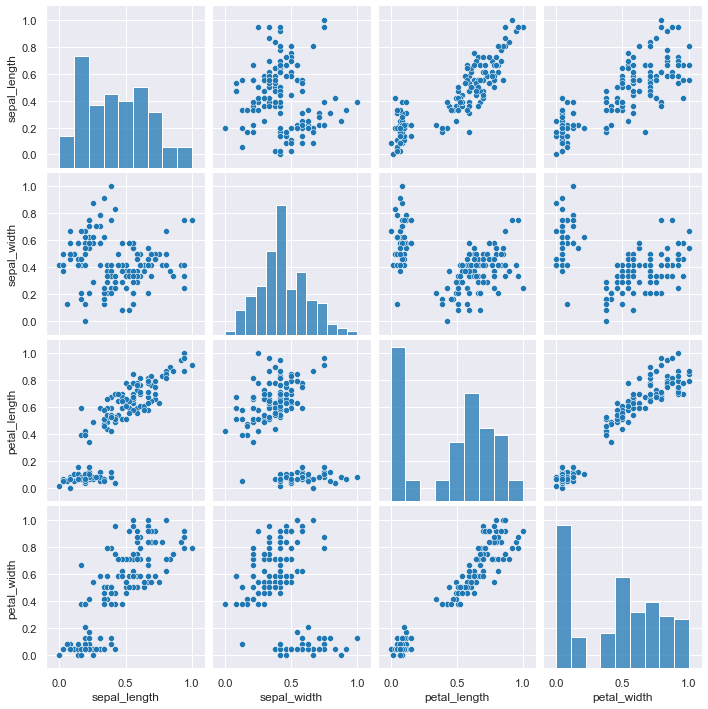

In [5]:
sns.pairplot(iris).set(xlim=(-.1,1.1), ylim=(-.1,1.1))
plt.show()

Através da visualização acima, é possível observar que:
* Todos os pares revelam dois agrupamentos disjuntos. Um grupo menor e unido, outro maior e disperso disperso. Dando indícios da presença de no mínimo duas classes;
* O par (sepal_width,sepal_length) é o que apresenta maior grau de espalhamento, além de correlação linear próxima a zero;
* O par (petal_width,petal_lenght) é o que apresenta menor grau de espalhamento, e altíssima correlação linear positiva. 

In [6]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [7]:
clusterview = Clustering_Visualization(iris)

## K-means com o par (sepal_width,sepal_length)

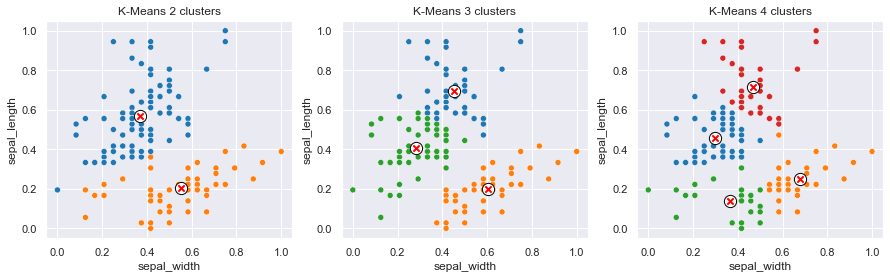

In [8]:
clusterview.plot2D('sepal_width', 'sepal_length', [2,3,4])

* Vemos que com 2 centróides não há uma separação ideal dos dois grupos identificados anteriormente durante a análise par a par.
* Usando 3 centróides, a separação destes grupos enfim acontece. E as instâncias restantes são divididas em 2 outros agrupamentos.
* E então, com 4 centróides, vê-se a criação de um grupo mais ao sul onde grande parte das instâncias estão distantes do centróide. 

#### Elbow Method

Mesmo com a visualização dos centróides e das instâncias englobadas por eles, ainda é difícil escolher o melhor valor para o parâmetro k do K-means. Para isso podemos usar outras abordagens, como por exemplo o método do cotovelo (Elbow Method). Este método consiste em, para cada k, calcular a distância de todas as instâncias ao seu centróide mais próximo e então somá-las. O número de clusters k ótimo será igual ao ponto no eixo x em que a curva da soma das distâncias passa a ter decaimento aproximadamente linear.

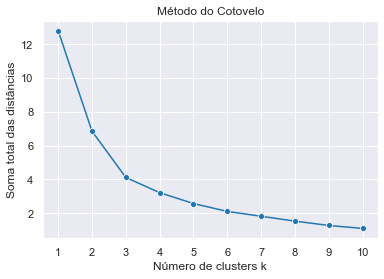

In [9]:
clusterview.elbow(['sepal_width', 'sepal_length'], 10)

Analisando a curva gerada pelo método do cotovelo para o par (sepal_width,sepal_length), vemos que é difícil dizer com exatidão a partir de que ponto a curva passa a ser aproximadamente linear. O decaimento é suave, mas o cotovelo parece acontecer entre k igual a 3 ou 4. Muito dessa suavização se deve ao grande espalhamento das instâncias, e da existência de fronteiras pouco definidas.

## K-means com o par (petal_width,petal_length)

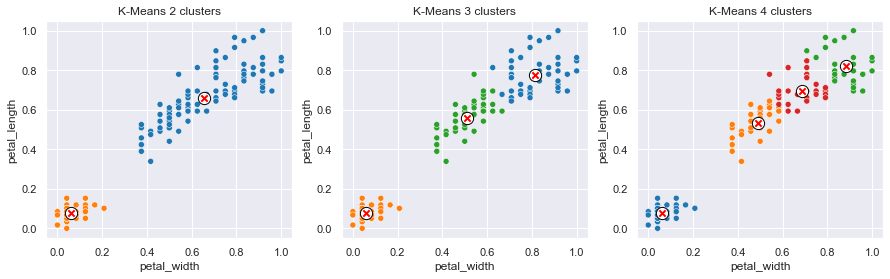

In [10]:
clusterview.plot2D('petal_width', 'petal_length', [2,3,4])

*  Quando há apenas 2 centróides, já pode-se ver o reconhecimento dos dois agrupamentos discutidos anteriormente. Muito devido a grande distância entre suas fronteiras. 
* Vemos ao longo dos gráficos que as sucessivas adições de centróides particionam cada vez mais o grupo onde há maior espalhamento.

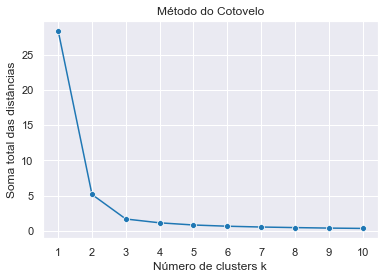

In [11]:
clusterview.elbow(['petal_width', 'petal_length'], 10)

O método do cotovelo para o par (petal_width,petal_length) revela uma curva de decaimento brusco antes de k=3, e um decaimento linear após este ponto. Neste caso é fácil identificar o número de clusters ótimo devido ao pouco espalhamento das instâncias, e também à presença de grupos isolados.

## K-means com todo o dataset

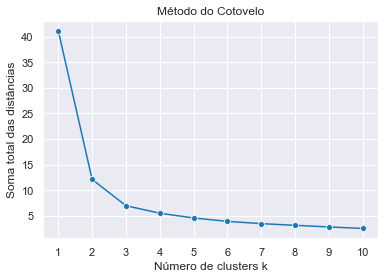

In [12]:
clusterview.elbow(iris.columns, 10)

Utilizando todas as 4 features do dataset, verifica-se que o número de clusters ótimo é igual a 3. Por fim, vamos visualizar os grupos formados pelo algoritmo k-means.

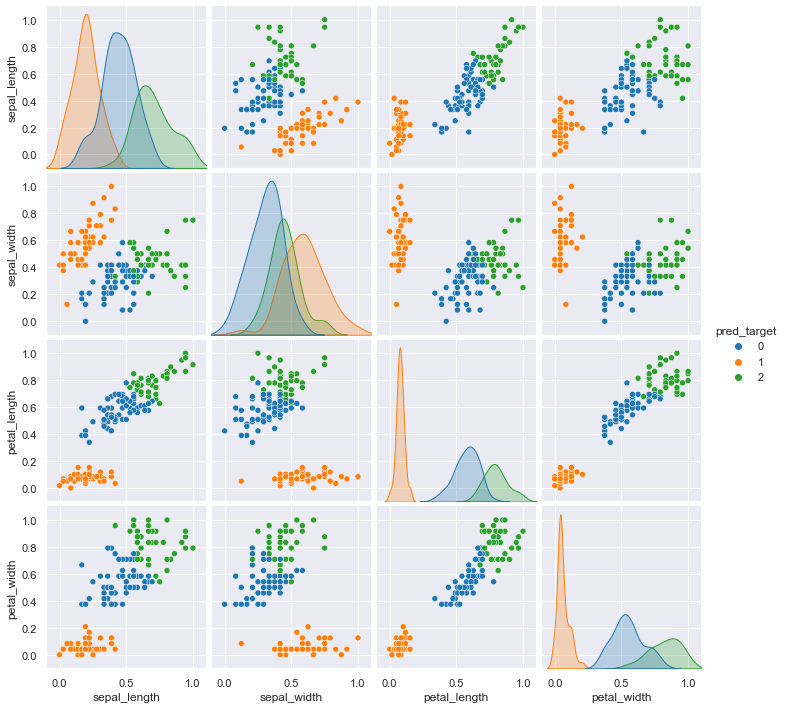

In [13]:
model = KMeans(n_clusters=3)
model.fit(iris)

iris['pred_target'] = model.labels_
sns.pairplot(iris, hue='pred_target', palette=sns.color_palette("tab10", 3)).set(xlim=(-.1,1.1), ylim=(-.1,1.1))
plt.show()

Como escolher as features para a execução do k-means? \
Utilizar todas as features do dataset é uma boa abordagem? \
E se as features não forem variáveis contínuas?